# Tarea - Caminata aleatoria

## Santiago Chavarria Minakata

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

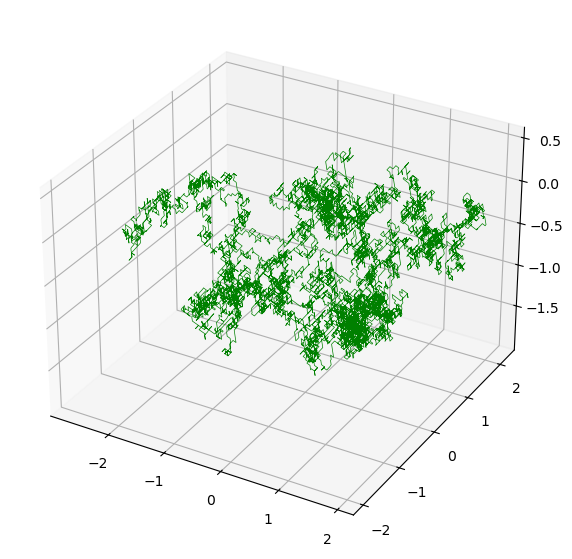

In [35]:
import numpy as np
import matplotlib.pyplot as plt
#sacado de chatgp ya que no sabia comoo graficar en 3d
from mpl_toolkits.mplot3d import Axes3D

dt = 0.001  #Delta 
t = 10      #teimpo
n = int(t / dt)  # Número de pasos de la simulación

#posiciones
Wx = [0]
Wy = [0] 
Wz = [0]
#me ayude de chatgtp , ya que me trabe , lo intente igualando X = np.random.choice(-1,1) , pero no me dio .
def X():
    return np.random.choice([-1, 1])
    
for i in range(n):
    Wx.append(Wx[-1] + X() * np.sqrt(dt))
    Wy.append(Wy[-1] + X() * np.sqrt(dt))
    Wz.append(Wz[-1] + X() * np.sqrt(dt))
   
# Gráfico 3D con ayuda del sitio de matplotlib
#https://chatgpt.com/g/g-mF4IQm2f2-simulacion/c/670d99eb-6d48-8008-a552-34c6be965c02, ademas veriique mi procedimiento con chtgtp
# por lo mismoo que nunca lo habia utilizado
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Wx, Wy, Wz, lw=0.5, color='g')
plt.show()



#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

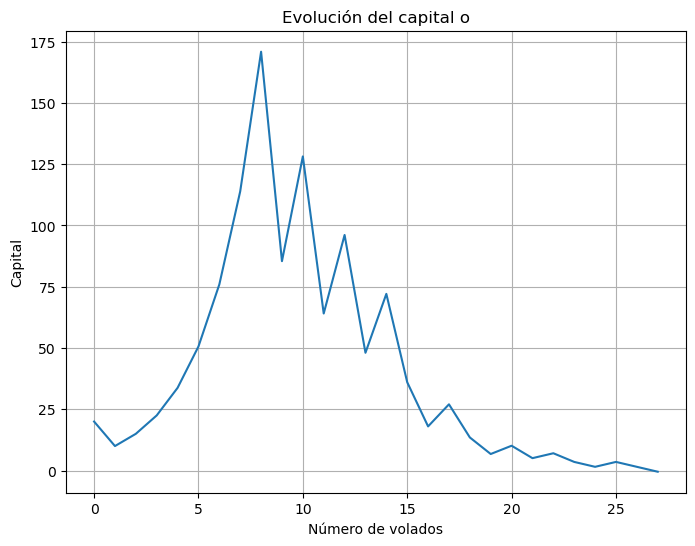

El numero de volados promedio para quedar en quiebra es : 26.0691


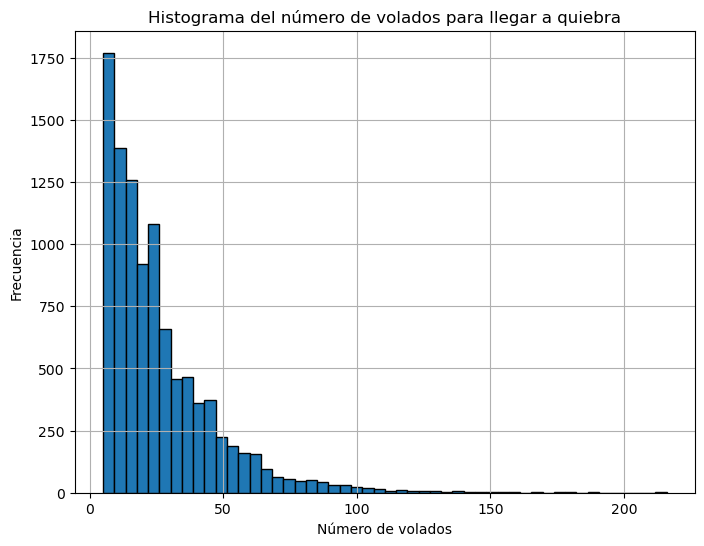

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
def apostador(C0):
    C = [C0] 
    n_volados = 0  

    while C[-1] > 0: 
        if C[-1] >= 6:
            a = C[-1] / 2  
        else:
            a = 2 
        if random.choice([True, False]):
            C.append(C[-1] + a)  
        else:
            C.append(C[-1] - a) 
        n_volados += 1
    return C, n_volados
# Graficar la evolución
C0 = 20 
capital_evolucion, _ = apostador(C0)
plt.figure(figsize=(8, 6))
plt.plot(capital_evolucion)
plt.title("Evolución del capital o")
plt.xlabel("Número de volados")
plt.ylabel("Capital")
plt.grid(True)
plt.show()

# Punto 2
n_apostadores = 10000  
volados_por_apostador = []
for p in range(n_apostadores):
    p, n_volados = apostador(C0)
    volados_por_apostador.append(n_volados)

promedio_volados = sum(volados_por_apostador) / len(volados_por_apostador)
print("El numero de volados promedio para quedar en quiebra es :",promedio_volados)

# Punto 3
plt.figure(figsize=(8, 6))
plt.hist(volados_por_apostador, bins=50, edgecolor='black')
plt.title("Histograma del número de volados para llegar a quiebra")
plt.xlabel("Número de volados")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

